# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**. 

In [1]:
import numpy as np
import tensorflow as tf

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [2]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [3]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
print(X_entreno.shape)

(60000, 28, 28)


Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [5]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [6]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [7]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [8]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [9]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [10]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [11]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [12]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [13]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [14]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [15]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [16]:
tamanio_capa_escondida = 50

# Definimos cómo se verá el modelo

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


In [17]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [18]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [19]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 2s - 4ms/step - accuracy: 0.8807 - loss: 0.4163 - val_accuracy: 0.9422 - val_loss: 0.2021
Epoch 2/5
500/500 - 1s - 2ms/step - accuracy: 0.9464 - loss: 0.1820 - val_accuracy: 0.9573 - val_loss: 0.1529
Epoch 3/5
500/500 - 1s - 1ms/step - accuracy: 0.9593 - loss: 0.1386 - val_accuracy: 0.9621 - val_loss: 0.1308
Epoch 4/5
500/500 - 1s - 1ms/step - accuracy: 0.9661 - loss: 0.1138 - val_accuracy: 0.9655 - val_loss: 0.1179
Epoch 5/5
500/500 - 1s - 1ms/step - accuracy: 0.9708 - loss: 0.0973 - val_accuracy: 0.9682 - val_loss: 0.1128


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [20]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9589 - loss: 20.5587


In [21]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 18.22. Precisión de prueba: 96.56%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.

## Nuevo Modelo
En este modelo se hará los siguientes cambios:
- Modificación de ancho de red
- Modificación de profundidad 
- Experimentación con redes profundas
- Funciones de activación
- Modificación de la tanda

### Modificación del ancho de red
Se modifica el tamaño de capa escondida a 200 y se vuelve a entrenar

In [22]:
tamanio_capa_escondida = 300 # modify hidden layer size 

In [23]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

In [24]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 3s - 6ms/step - accuracy: 0.9257 - loss: 0.2563 - val_accuracy: 0.9626 - val_loss: 0.1209
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9710 - loss: 0.0955 - val_accuracy: 0.9655 - val_loss: 0.1094
Epoch 3/5
500/500 - 2s - 3ms/step - accuracy: 0.9806 - loss: 0.0608 - val_accuracy: 0.9762 - val_loss: 0.0785
Epoch 4/5
500/500 - 2s - 4ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9764 - val_loss: 0.0815
Epoch 5/5
500/500 - 2s - 3ms/step - accuracy: 0.9891 - loss: 0.0328 - val_accuracy: 0.9767 - val_loss: 0.0809


In [26]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 15.5070


In [27]:
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 14.22. Precisión de prueba: 97.77%


### Resultados
1. ¿Cómo cambia la precisión de validación del modelo?<br>
En este caso tuvimos menor pérdida con 200 que con el valor anterior de 50. La precisión fue un poco más elevada 
2. ¿Cuánto tiempo tarda el algoritmo en entrenar?<br>
Con 200 capas escondidas tardó bastante poco. Unos cuantos milisegundos.
3. ¿Cuál ofrece mejor rendimiento?<br>
Con la de 200 tuvimos pérdida baja, similarmente con 100 hubo unos resultados similares. Ya cuando intentamos utilizar 300<br>
la cantidad de pérdida fue aumentando aunque la precisión fue similar. Mientras que con 500 capas, la pérdida fue ligeramente menor pero aumentó por igual
y con una precisión de casi 98%. <br>
Por lo que podemos ver que realmente el rendimiento se mantiene bastante bueno, pero entre más capas, hay menor pérdida, pero más tiempo de entrenamiento.
Por lo que vimos que en rendimiento y precisión era menor 300 capas. 

## Modificación de la profundiad de la red
En este caso le agregaremos una nueva capa oculta al modelo.<br>
De momento los valores a utilizar son:
* tamaño de capa : 300
* tamaño entrada : 784
* tamaño salida : 10<br>
Se utiliza<br>
* activación ReLU para cada capa escondida
* activación softmax para la de salida
* optimizador adam
* pérdida con entropía cruzada
* 5 épocas 

In [28]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 3ra capa escondida agregada

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

In [29]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 3s - 6ms/step - accuracy: 0.9244 - loss: 0.2500 - val_accuracy: 0.9640 - val_loss: 0.1189
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9714 - loss: 0.0945 - val_accuracy: 0.9721 - val_loss: 0.0970
Epoch 3/5
500/500 - 2s - 4ms/step - accuracy: 0.9804 - loss: 0.0638 - val_accuracy: 0.9718 - val_loss: 0.0932
Epoch 4/5
500/500 - 2s - 4ms/step - accuracy: 0.9848 - loss: 0.0468 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 5/5
500/500 - 2s - 4ms/step - accuracy: 0.9873 - loss: 0.0383 - val_accuracy: 0.9737 - val_loss: 0.0987


In [31]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 22.8520


### Resultados
1. Precisión de validación con el anterior modelo,<br>
Este modelo presenta una validación similar a la del modelo anterior. Su exactitud es similar y su pérdida también. 
2. Impacto en tiempo de ejecución.<br>
El tiempo de ejecución se vio levemente afectado por el añadimiento de una capa escondida extra.
3. Cambios necesarios al código.<br>
El código se mantuvi similar, solamente se tuvo que agregar la línea <br>
`tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),` <br>
al modelo para que agregarse una capa escondida. 

## Redes Profundas
Aquí experimentaremos con el ancho de cada capa y cómo afecta esto en su tiempo de ejecución. <br>
Veremos si existe problemas de desvanecimiento de gradiente. 

In [32]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 3ra capa escondida agregada
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 4ta capa escondida agregada 
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 5ta capa escondida agregada 

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

In [33]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9201 - loss: 0.2602 - val_accuracy: 0.9646 - val_loss: 0.1203
Epoch 2/5
500/500 - 3s - 5ms/step - accuracy: 0.9666 - loss: 0.1098 - val_accuracy: 0.9680 - val_loss: 0.1087
Epoch 3/5
500/500 - 3s - 5ms/step - accuracy: 0.9761 - loss: 0.0773 - val_accuracy: 0.9702 - val_loss: 0.1075
Epoch 4/5
500/500 - 2s - 5ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9730 - val_loss: 0.0965
Epoch 5/5
500/500 - 2s - 5ms/step - accuracy: 0.9851 - loss: 0.0472 - val_accuracy: 0.9762 - val_loss: 0.0846


In [35]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9705 - loss: 18.4991


### Resultados
1. Precisión de validación para cada intento<br>
    - 4 capas: accuracy 97.54% / pérdida 15.35
    - 5 capas: accuracy 97.31% / pérdida 17.00
2. Relación entre profundidad y tiempo de ejecución<br>
    Como podemos ver, entre más capas el tiempo de ejecución del modelo va demorando poco a poco<br>
    cada vez más. Esto se debe sencillamente a que entre más capas tenemos, hay más transformaciones e interacciones <br>
    entre las capas neuronales. Lo que causa que se demore cada vez más conforme se aumenta el número de capas.
3. Problemas de desvanecimiento de gradiente<br>
    Entre más capas neuronales tenemos, más activaciones estaremos haciendo, lo cual puede llevar a que
    los coeficientes vayan siendo más y más pequeños conforme se agregan más capas debido a que si los <br>
    coeficientes son menores a 1, la multiplicación entre estos dará como resultado un número más y más pequeño<br>
    entre más capas pase. Por eso a veces más capas no significa mejor resultado. 

## Funciones de Activación I
Aplicaremos funciones de activación sigmoidales a todas las capas. 

In [36]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 2nda capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 3ra capa escondida agregada
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 4ta capa escondida agregada 
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 5ta capa escondida agregada 

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

In [37]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 4s - 7ms/step - accuracy: 0.7022 - loss: 0.8728 - val_accuracy: 0.9056 - val_loss: 0.3286
Epoch 2/5
500/500 - 2s - 5ms/step - accuracy: 0.9240 - loss: 0.2667 - val_accuracy: 0.9393 - val_loss: 0.2047
Epoch 3/5
500/500 - 2s - 5ms/step - accuracy: 0.9459 - loss: 0.1856 - val_accuracy: 0.9550 - val_loss: 0.1509
Epoch 4/5
500/500 - 2s - 5ms/step - accuracy: 0.9587 - loss: 0.1396 - val_accuracy: 0.9608 - val_loss: 0.1337
Epoch 5/5
500/500 - 2s - 5ms/step - accuracy: 0.9662 - loss: 0.1156 - val_accuracy: 0.9661 - val_loss: 0.1203


In [39]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.1720


### Resultados
1. Compare resultados anteriores
    - 3 capas sigmoiodales : accuracy 96.26% / pérdida 0.12
    - 3 capas ReLU : accuracy 97.94 / pérdida 13.69
    - 4 capas sigmoidales : 95.61 / pérdida 0.1605
    - 4 capas ReLU : accuracy 97.54% / pérdida 15.35
    - 5 capas sigmoidales : 95.36 / pérdida 0.1758
    - 5 capas ReLU : accuracy 97.31% / pérdida 17.00
2. Analice el impacto de velocidad de convergencia<br>
    La velocidad de convergencia es un poco diferente pero en este caso parece ser mejor.

## Funciones de Activación II

In [40]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh'), # 2nda capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 3ra capa escondida agregada
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 4ta capa escondida agregada 
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'), # 5ta capa escondida agregada 

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

In [41]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 3s - 7ms/step - accuracy: 0.8725 - loss: 0.4416 - val_accuracy: 0.9543 - val_loss: 0.1597
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9632 - loss: 0.1299 - val_accuracy: 0.9669 - val_loss: 0.1163
Epoch 3/5
500/500 - 2s - 4ms/step - accuracy: 0.9739 - loss: 0.0881 - val_accuracy: 0.9632 - val_loss: 0.1338
Epoch 4/5
500/500 - 2s - 5ms/step - accuracy: 0.9809 - loss: 0.0646 - val_accuracy: 0.9738 - val_loss: 0.0988
Epoch 5/5
500/500 - 2s - 5ms/step - accuracy: 0.9839 - loss: 0.0530 - val_accuracy: 0.9753 - val_loss: 0.0926


In [43]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.1092


### Resultados
1. Comparación entre modelos.
    - 3 capas sigmoiodales : accuracy 96.26% / pérdida 0.12
    - 3 capas ReLU : accuracy 97.47% / pérdida 0.0995
    - 3 capas ReLU & Tanh : accuracy 97.45% / pérdida 0.1220
    - 4 capas sigmoidales : 95.61% / pérdida 0.1605
    - 4 capas ReLU : accuracy 97.54% / pérdida 15.35
    - 4 capas ReLU & Tanh : accuracy 97.40% / pérdida 0.1023
    - 5 capas sigmoidales : 95.36% / pérdida 0.1758
    - 5 capas ReLU : accuracy 97.31% / pérdida 17.00
    - 5 capas ReLU & Tanh : accuracy 97.36% / pérdida 0.1035
2. Las ventajas y desventajas.<br>
    ReLU: <br>
    - ventaja:
    - desventaja: 
    Sigmoidal: <br>
    - ventaja: 
    - desventaja: 
    Tanh: <br>
    - ventaja:
    - desventaja: 
    

## Modificar el tamaño del batch
En este caso vamos a modificar el tamaño del batch a 10000 para ver los cambios de desempeño y pérdida.

In [44]:
# Ejercicio 6: Batch Size = 10 000
# -----------------------------
# 1) Reiniciamos el pipeline eliminando cualquier batch previo
#    (si vienes de ejercicios anteriores con datos_entreno ya batcheado)

datos_entreno    = datos_entreno.unbatch()
datos_validacion = datos_validacion.unbatch()
datos_prueba     = datos_prueba.unbatch()

In [45]:

# 2) Definimos el nuevo tamaño de batch grande
TAMANIO_TANDA = 10000

In [46]:
# 3) Recreamos los datasets para batch grande
#    (si prefieres, también puedes reusar X_entreno, y_entreno, etc.)

datos_entreno = (
    tf.data.Dataset
      .from_tensor_slices((X_entreno, y_entreno))
      .shuffle(buffer_size=num_obs_entreno)
      .batch(TAMANIO_TANDA)
)

datos_validacion = (
    tf.data.Dataset
      .from_tensor_slices((X_validacion, y_validacion))
      .batch(TAMANIO_TANDA)
)

datos_prueba = (
    tf.data.Dataset
      .from_tensor_slices((X_prueba, y_prueba))
      .batch(TAMANIO_TANDA)
)

In [47]:
# 4) Verificamos que ahora la forma sea la correcta
for x, y in datos_entreno.take(1):
    print("Shape X:", x.shape)  # -> (10000, 28, 28)
    print("Shape y:", y.shape)  # -> (10000,)


Shape X: (10000, 28, 28)
Shape y: (10000,)


In [48]:
# 5) Definimos y compilamos el modelo (igual que antes)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [49]:
# 6) Entrenamos
modelo.fit(
    datos_entreno,
    epochs=NUMERO_EPOCAS,
    validation_data=datos_validacion,
    verbose=2
)

Epoch 1/5
5/5 - 2s - 377ms/step - accuracy: 0.3534 - loss: 2.1397 - val_accuracy: 0.6318 - val_loss: 1.7835
Epoch 2/5
5/5 - 1s - 147ms/step - accuracy: 0.6942 - loss: 1.5293 - val_accuracy: 0.7665 - val_loss: 1.1247
Epoch 3/5
5/5 - 1s - 155ms/step - accuracy: 0.7807 - loss: 0.9725 - val_accuracy: 0.8449 - val_loss: 0.7149
Epoch 4/5
5/5 - 1s - 145ms/step - accuracy: 0.8378 - loss: 0.6634 - val_accuracy: 0.8739 - val_loss: 0.5114
Epoch 5/5
5/5 - 1s - 147ms/step - accuracy: 0.8694 - loss: 0.4998 - val_accuracy: 0.8966 - val_loss: 0.3977


In [50]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8853 - loss: 0.3910


- Documente el cambio en el tiempo de entrenamiento

In [52]:
def crear_modelo():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh'),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'),
        tf.keras.layers.Dense(tamanio_salida, activation='softmax')
    ])
    modelo.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return modelo

In [53]:
import time
# Parámetros comunes
epochs = NUMERO_EPOCAS
buffer = num_obs_entreno

# A) Pipeline y medición para batch pequeño (100)
bs_small = 100
datos_entreno_small = (
    tf.data.Dataset
      .from_tensor_slices((X_entreno, y_entreno))
      .shuffle(buffer)
      .batch(bs_small)
)
datos_validacion_small = (
    tf.data.Dataset
      .from_tensor_slices((X_validacion, y_validacion))
      .batch(bs_small)
)

modelo_small = crear_modelo()
start_small = time.time()
history_small = modelo_small.fit(
    datos_entreno_small,
    epochs=epochs,
    validation_data=datos_validacion_small,
    verbose=0
)
elapsed_small = time.time() - start_small

# B) Pipeline y medición para batch grande (10000)
bs_large = 10000
# deshacemos cualquier estado anterior
datos_entreno_large = (
    tf.data.Dataset
      .from_tensor_slices((X_entreno, y_entreno))
      .shuffle(buffer)
      .batch(bs_large)
)
datos_validacion_large = (
    tf.data.Dataset
      .from_tensor_slices((X_validacion, y_validacion))
      .batch(bs_large)
)

modelo_large = crear_modelo()
start_large = time.time()
history_large = modelo_large.fit(
    datos_entreno_large,
    epochs=epochs,
    validation_data=datos_validacion_large,
    verbose=0
)
elapsed_large = time.time() - start_large

# Resultados
print(f"Tiempo (batch={bs_small}): {elapsed_small:.2f} s")
print(f"Tiempo (batch={bs_large}): {elapsed_large:.2f} s")

# Guardar en variables para documentar
tiempo_batch_pequeno = elapsed_small
tiempo_batch_grande = elapsed_large


Tiempo (batch=100): 18.21 s
Tiempo (batch=10000): 7.66 s


Tras medir los tiempos de entrenamiento con 2 tamaños de batch distinos (100 y 10000) tenemos los siguientes resultados.
- batch 100: 18.21 segundos
- batch 10000: 7.66 segundos
* Notamos que al aumentar el tamaño de batch de 100 a 10,000, el tiempo total de entrenamiento se reduce un 57.9%.
* con batch = 100 (50 000 ejemplos / 100) había 500 pasos de actualización por época.
* Con batch=10 000 (50 000 ejemplos / 10 000) hay únicamente 5 pasos de actualización por época.
Esto se debe por menos overhead de lotes al llamar fit() con un batch incurre en operaciones CPU/GPU.

- Analice el impacto en la precisión del modelo

In [56]:
# Extraer accuracy final de entrenamiento y validación de cada historia
acc_train_small = history_small.history['accuracy'][-1]
acc_val_small   = history_small.history['val_accuracy'][-1]
acc_train_large = history_large.history['accuracy'][-1]
acc_val_large   = history_large.history['val_accuracy'][-1]

# Evaluar ambos modelos sobre el mismo conjunto de prueba rebatchado
# (suponiendo que datos_prueba ya está batcheado con 10000)
loss_test_small, acc_test_small = modelo_small.evaluate(
    tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba)).batch(100),
    verbose=0
)
loss_test_large, acc_test_large = modelo_large.evaluate(
    tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba)).batch(10000),
    verbose=0
)

In [57]:
print(f"Train acc (bs=100):       {acc_train_small:.4f}")
print(f"Validation acc (bs=100):  {acc_val_small:.4f}")
print(f"Test acc (bs=100):        {acc_test_small:.4f}\n")

print(f"Train acc (bs=10000):    {acc_train_large:.4f}")
print(f"Validation acc (bs=10000): {acc_val_large:.4f}")
print(f"Test acc (bs=10000):     {acc_test_large:.4f}")

Train acc (bs=100):       0.9883
Validation acc (bs=100):  0.9768
Test acc (bs=100):        0.9754

Train acc (bs=10000):    0.8428
Validation acc (bs=10000): 0.8760
Test acc (bs=10000):     0.8702


Estos resultados muestran un cambio entre velocidad y calidad de convergencia
* Con batch = 100 tenemos los siguientes resultados: Train 0.9883 vs Val 0.9768 vs Test 0.9754
* El modelo casi “aprende de memoria” el conjunto de entrenamiento (muy alta train acc) pero, gracias al ruido del gradiente, mantiene una validación y test sólidas (~97.6 %–97.5 %). Ese ruido actúa como regularizador.

Por otro lado, con batch 10000
* Train 0.8428 vs Val 0.8760 vs Test 0.8702
* El entrenamiento converge más rápido en tiempo, pero con pasos muy “suaves” y pocos updates, el modelo no alcanza un mínimo tan óptimo en train (84 % vs 98 %). Sorprendentemente, la validación y test tampoco mejoran: la generalización empeora (87 % vs 97 %).

* Explique teóricamente por qué se observan estos cambios.


El ruido es la estimacion del gradiente como forma de regularizacion.
* Batch = 100 al actualizar los pesos se calcula cono una muestra reducida del dataset, por lo que el gradiente es ruidoso.
* el ruido impode que el optimizador caiga en minimos muy afilados de la superficie de perdida, favoreciendo en cambio minimos más anchhos.

al tener actualizaciones menos frecuentes el batch 10000 el gradiente que calcula cada paso se acerca mucho al gradiente verdadero de todo el dataset.

# Descenso de Gradiente Estocástico (SGD)

In [58]:
bs_sgd = 1
buffer = num_obs_entreno  # el mismo número total de ejemplos de entrenamiento
epochs = NUMERO_EPOCAS

In [59]:
datos_entreno_sgd = (
    tf.data.Dataset
      .from_tensor_slices((X_entreno, y_entreno))
      .shuffle(buffer)
      .batch(bs_sgd)
)
datos_validacion_sgd = (
    tf.data.Dataset
      .from_tensor_slices((X_validacion, y_validacion))
      .batch(bs_sgd)
)


In [60]:
def crear_modelo():
    m = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh'),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'),
        tf.keras.layers.Dense(tamanio_salida, activation='softmax')
    ])
    m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return m

modelo_sgd = crear_modelo()

In [61]:
# Medir tiempo de entrenamiento
start_sgd = time.time()
history_sgd = modelo_sgd.fit(
    datos_entreno_sgd,
    epochs=epochs,
    validation_data=datos_validacion_sgd,
    verbose=0
)
elapsed_sgd = time.time() - start_sgd

print(f"Tiempo (batch=1): {elapsed_sgd:.2f} s")

Tiempo (batch=1): 729.11 s


In [62]:
acc_train_sgd = history_sgd.history['accuracy'][-1]
acc_val_sgd   = history_sgd.history['val_accuracy'][-1]
loss_test_sgd, acc_test_sgd = modelo_sgd.evaluate(
    tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba)).batch(1),
    verbose=0
)
print(f"Train acc (bs=1): {acc_train_sgd:.4f}")
print(f"Val acc   (bs=1): {acc_val_sgd:.4f}")
print(f"Test acc  (bs=1): {acc_test_sgd:.4f}")


Train acc (bs=1): 0.9663
Val acc   (bs=1): 0.9652
Test acc  (bs=1): 0.9640


* El tiempo para Batch = 1 es de 729.11 s 
* El tiempo para Batch = 100 es de 18.21 s
* El tiempo para Batch = 10 000 es de 7.66 s
Estos resultados fueron en 5 epocas.
* Con bs=1 hiciste 50 000 updates/época → 250000 updates en 5 épocas.

* Con bs=100 fueron 500 updates/época → 2 500 updates en 5 épocas.

* Con bs=10 000 solo 5 updates/época → 25 updates en 5 épocas.

* Por eso SGD puro es ~ 40× más lento que bs=100 y ~ 95× más lento que bs=10 000.

- Con estabilidad y precision
* * El tiempo para Batch = 1 es de 729.11 s 
* El tiempo para Batch = 100 es de 18.21 s
* El tiempo para Batch = 10 000 es de 7.66 s
Estos resultados fueron en 5 epocas.
* Con bs=1 hiciste 50 000 updates/época → 250000 updates en 5 épocas.

* Con bs=100 fueron 500 updates/época → 2 500 updates en 5 épocas.

* Con bs=10 000 solo 5 updates/época → 25 updates en 5 épocas.

* Por eso SGD puro es ~ 40× más lento que bs=100 y ~ 95× más lento que bs=10 000.

- Con estabilidad y precision
* Train acc (bs=1): 0.9663
* Val acc   (bs=1): 0.9652
* Test acc  (bs=1): 0.9640
con bs=1:
* La train acc (96.63 %) es menor que la de bs=100 pero aún alta, mostrando que el modelo aprende aunque muy lentamente.
* La val/test acc (~96.5 % / 96.4 %) reflejan buena generalización, solo ligeramente por debajo de bs=100, gracias al gran ruido que actúa como regularizador.

# Coherencias con la teoria

## Varianza del gradiente

* bs pequeño → gradientes muy variables → ayuda a evitar mínimos agudos (sharp minima) y favorece flat minima que generalizan.
* Pero con ruido máximo, se requieren muchos pasos para “afinar” hacia esos mínimos “anchos”.

## Frecuencia vs coste
* Muchas actualizaciones (50 000/época) ralentizan enormemente el entrenamiento.
* Pocos, grandes batches (bs=10 000) dan pasos caros pero en muy poca cantidad


# Tasa de aprendizaje baja

Evaluar cómo afecta una tasa de aprendizaje muy baja (1e-4) a la convergencia y precisión del modelo.



In [63]:
# Creación de un nuevo modelo (misma arquitectura)
modelo_lr_baja = crear_modelo()

# Asignar Adam con lr baja
optimizador_lr_baja = tf.keras.optimizers.Adam(learning_rate=1e-4)
modelo_lr_baja.compile(
    optimizer=optimizador_lr_baja,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
start_lr = time.time()
history_lr = modelo_lr_baja.fit(
    datos_entreno,             # usa el pipeline estándar (bs=100)
    epochs=NUMERO_EPOCAS,
    validation_data=datos_validacion,
    verbose=2
)
elapsed_lr = time.time() - start_lr
print(f"Tiempo (lr=1e-4): {elapsed_lr:.2f} s")

Epoch 1/5
5/5 - 4s - 740ms/step - accuracy: 0.0998 - loss: 2.4667 - val_accuracy: 0.0961 - val_loss: 2.3957
Epoch 2/5
5/5 - 2s - 319ms/step - accuracy: 0.0998 - loss: 2.3583 - val_accuracy: 0.0964 - val_loss: 2.3011
Epoch 3/5
5/5 - 1s - 289ms/step - accuracy: 0.1165 - loss: 2.2726 - val_accuracy: 0.1660 - val_loss: 2.2233
Epoch 4/5
5/5 - 1s - 284ms/step - accuracy: 0.2584 - loss: 2.2002 - val_accuracy: 0.3940 - val_loss: 2.1547
Epoch 5/5
5/5 - 1s - 284ms/step - accuracy: 0.4355 - loss: 2.1344 - val_accuracy: 0.5266 - val_loss: 2.0892
Tiempo (lr=1e-4): 9.66 s


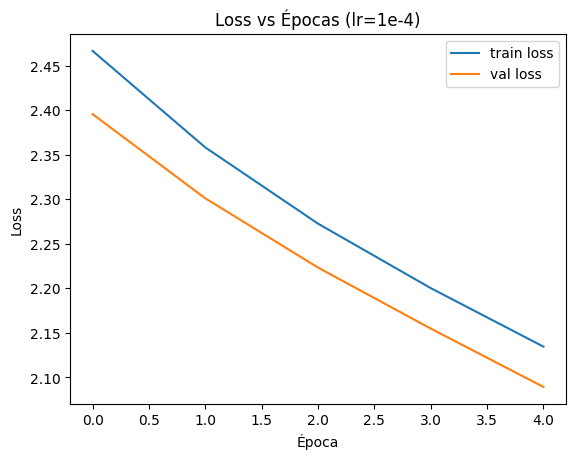

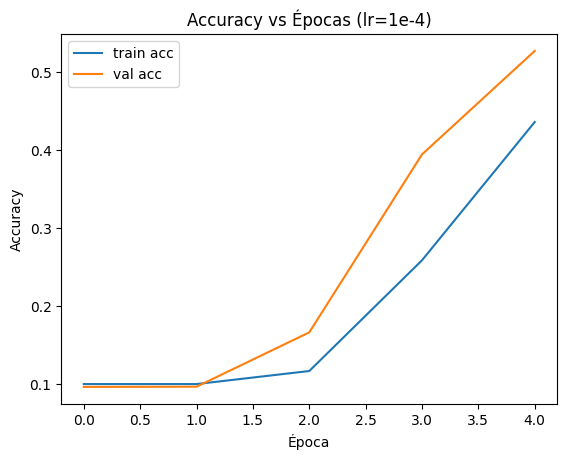

In [65]:
import matplotlib.pyplot as plt

# Pérdida
plt.plot(history_lr.history['loss'], label='train loss')
plt.plot(history_lr.history['val_loss'], label='val loss')
plt.title('Loss vs Épocas (lr=1e-4)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Precisión
plt.plot(history_lr.history['accuracy'], label='train acc')
plt.plot(history_lr.history['val_accuracy'], label='val acc')
plt.title('Accuracy vs Épocas (lr=1e-4)')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
loss_epoch1 = history_lr.history['loss'][0]
loss_final  = history_lr.history['loss'][-1]
print(f"Loss ep1: {loss_epoch1:.4f}, Loss final: {loss_final:.4f}")

Loss ep1: 2.4667, Loss final: 2.1344


* Impacto de convergencia del modelo
- Tiempo total (5 epocas) 9.66 s, frente a 4 s con lr=1e-3.
- velocidad de descenso de la perdida:
* Época 1: loss = 2.4667

* Época 5: loss = 2.1344
* En 5 épocas la pérdida solo baja un ~13.5 %, cuando con lr por defecto (1e-3) habría caído por encima de un 70 %.

- Reducir la lr a 1e-4 hace que el modelo converja muy despacio: tras 5 épocas la pérdida solo baja de 2.467 a 2.134 y la precisión de validación sube solo hasta ~52.7 %. Esto confirma que una tasa demasiado baja provoca pasos de actualización diminutos: no hay un estancamiento en un mínimo local (porque loss y acc mejoran), sino que se requieren muchas más iteraciones para alcanzar accuracies comparables a lr=1e-3

# Tasa de Aprendizaje Alta
Evaluar cómo una tasa de aprendizaje elevada (2e-2) afecta la estabilidad del entrenamiento y la velocidad de convergencia.

In [67]:
# Crear y compilar el modelo con lr alta
def crear_modelo():
    m = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh'),
        tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'),
        tf.keras.layers.Dense(tamanio_salida, activation='softmax')
    ])
    m.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return m

In [68]:
modelo_high_lr = crear_modelo()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
start_high = time.time()
history_high = modelo_high_lr.fit(
    datos_entreno,           # bs=100
    epochs=NUMERO_EPOCAS,
    validation_data=datos_validacion,
    verbose=2
)
elapsed_high = time.time() - start_high
print(f"Tiempo (lr=0.02): {elapsed_high:.2f} s")

Epoch 1/5
5/5 - 3s - 598ms/step - accuracy: 0.1467 - loss: 3.3621 - val_accuracy: 0.1514 - val_loss: 2.6594
Epoch 2/5
5/5 - 1s - 261ms/step - accuracy: 0.2205 - loss: 2.3111 - val_accuracy: 0.3476 - val_loss: 1.9250
Epoch 3/5
5/5 - 2s - 336ms/step - accuracy: 0.3811 - loss: 1.7726 - val_accuracy: 0.5721 - val_loss: 1.5236
Epoch 4/5
5/5 - 1s - 287ms/step - accuracy: 0.6609 - loss: 1.3579 - val_accuracy: 0.7278 - val_loss: 1.1089
Epoch 5/5
5/5 - 1s - 290ms/step - accuracy: 0.7657 - loss: 0.9685 - val_accuracy: 0.8384 - val_loss: 0.7414
Tiempo (lr=0.02): 8.90 s


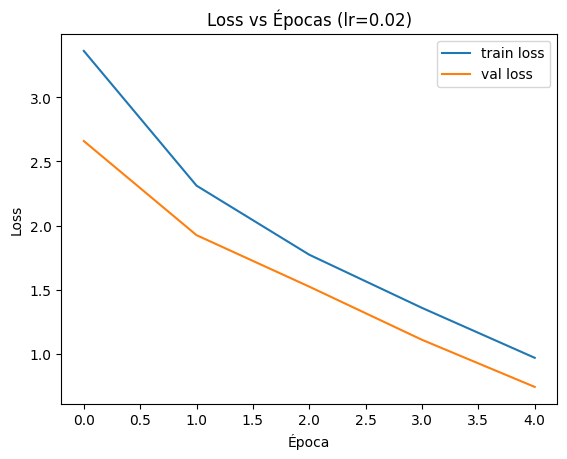

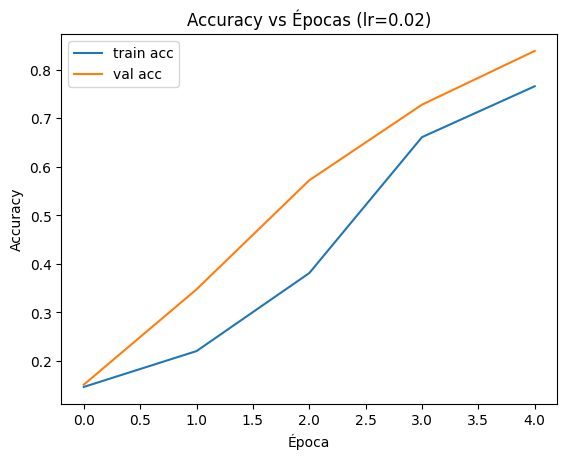

In [70]:
# Loss vs épocas\plt.figure()
plt.plot(history_high.history['loss'], label='train loss')
plt.plot(history_high.history['val_loss'], label='val loss')
plt.title('Loss vs Épocas (lr=0.02)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy vs épocas
plt.figure()
plt.plot(history_high.history['accuracy'], label='train acc')
plt.plot(history_high.history['val_accuracy'], label='val acc')
plt.title('Accuracy vs Épocas (lr=0.02)')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

velocidad de convergencia


In [71]:
# Métricas finales\#acceder a la última accuracy de entrenamiento y validación
acc_train_high = history_high.history['accuracy'][-1]
acc_val_high   = history_high.history['val_accuracy'][-1]
# Evaluación en test
_, acc_test_high = modelo_high_lr.evaluate(
    tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba)).batch(100),
    verbose=0
)
# Imprimir métricas finales
print(f"Train acc (lr=0.02): {acc_train_high:.4f}")
print(f"Val acc   (lr=0.02): {acc_val_high:.4f}")
print(f"Test acc  (lr=0.02): {acc_test_high:.4f}")

# Convergencia inicial (época 1)
loss1_high = history_high.history['loss'][0]
acc1_high  = history_high.history['accuracy'][0]
print(f"Loss ep1: {loss1_high:.4f}, Acc ep1: {acc1_high:.4f}")

Train acc (lr=0.02): 0.7657
Val acc   (lr=0.02): 0.8384
Test acc  (lr=0.02): 0.8300
Loss ep1: 3.3621, Acc ep1: 0.1467


Con lr = 0.02, las curvas de pérdida y accuracy se comportan de forma muy suave y monótona a lo largo de las 5 épocas:
* Loss desciende de 3.3621 en la época 1 a 0.9685 en la 5
* Val loss baja de 2.6594 a 0.7414
* Train acc sube de 0.1467 a 0.7657
* Val acc crece de 0.1514 a 0.8384

# analisis divergencia o mejorar en la velocidad de convergencia
* Velocidad: con lr=0.02 tarda 8.90 s en 5 épocas (frente a ~4 s con la lr por defecto de 0.001).
* Convergencia inicial: en solo 1 época la pérdida baja de 3.3621 a 2.3111 y la accuracy pasa de 0.1467 a 0.2205, un descenso/avance mucho más pronunciado que con lr = 0.001.
* Conclusión: no se produce divergencia—al contrario, lr=0.02 acelera la convergencia de forma estable, alcanzando en la 5ª época una train acc de 76.6 % y una val acc de 83.8 %, claramente superiores a los resultados con lr demasiado bajo y comparables a lr estándar, pero en menos iteraciones.

# optimizacion avanzada

In [72]:
def crear_modelo_reg(drop_rate=0.0, l2_rate=0.0):
    # L2 regularizer
    reg = tf.keras.regularizers.l2(l2_rate) if l2_rate > 0 else None

    modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),

        tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dropout(drop_rate),

        tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh', kernel_regularizer=reg),
        tf.keras.layers.Dropout(drop_rate),

        tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid', kernel_regularizer=reg),
        tf.keras.layers.Dropout(drop_rate),

        tf.keras.layers.Dense(tamanio_salida, activation='softmax')
    ])
    modelo.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return modelo

In [73]:
configs = [
    {'name':'baseline',      'drop':0.0, 'l2':0.0},
    {'name':'dropout_0.2',   'drop':0.2, 'l2':0.0},
    {'name':'dropout_0.5',   'drop':0.5, 'l2':0.0},
    {'name':'l2_1e-4',       'drop':0.0, 'l2':1e-4},
    {'name':'l2_1e-3',       'drop':0.0, 'l2':1e-3},
    {'name':'drop0.2_l2_1e-4','drop':0.2, 'l2':1e-4},
]

resultados = []
for cfg in configs:
    print(f"\n=== Entrenando {cfg['name']} ===")
    modelo = crear_modelo_reg(cfg['drop'], cfg['l2'])

    # Medir tiempo
    start = time.time()
    history = modelo.fit(
        datos_entreno,
        epochs=NUMERO_EPOCAS,
        validation_data=datos_validacion,
        verbose=0
    )
    tiempo = time.time() - start

    # Métricas finales
    acc_train = history.history['accuracy'][-1]
    acc_val   = history.history['val_accuracy'][-1]
    _, acc_test = modelo.evaluate(
        tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba)).batch(100),
        verbose=0
    )

    resultados.append({
        'config': cfg['name'],
        'time_s': tiempo,
        'train_acc': acc_train,
        'val_acc': acc_val,
        'test_acc': acc_test
    })

# Mostrar resultados
import pandas as pd
df_res = pd.DataFrame(resultados)
df_res


=== Entrenando baseline ===

=== Entrenando dropout_0.2 ===

=== Entrenando dropout_0.5 ===

=== Entrenando l2_1e-4 ===

=== Entrenando l2_1e-3 ===

=== Entrenando drop0.2_l2_1e-4 ===


,config,time_s,train_acc,val_acc,test_acc
0,baseline,9.273052,0.86178,0.8910,0.8824
1,dropout_0.2,10.662083,0.80644,0.8791,0.8700
2,dropout_0.5,10.693553,0.71142,0.8649,0.8469
3,l2_1e-4,8.577861,0.85664,0.8863,0.8794
4,l2_1e-3,7.984940,0.85084,0.8795,0.8714
5,drop0.2_l2_1e-4,6.164349,0.80078,0.8701,0.8572


* Baseline: sin regularización, el modelo sobreajusta ligeramente (train-val gap ~3%), con buena test acc (88.2%).

* Dropout 0.2: reduce el gap (train-val ~7.3%), pero baja tanto train como val acc (~88.2%→87.0% test), y aumenta ligeramente el tiempo.

* Dropout 0.5: sobre-regulariza, disminuye accuracy en todos (test 84.7%), tiempo elevado.

* L2 1e-4: mantiene train acc alto (85.7%), reduce gap (train-val ~3%), test acc 87.9% similar al baseline y acelera el tiempo.

* L2 1e-3: incrementa la penalización, ligera reducción en train (85.1%) y val (87.9%), test similar (87.1%), tiempo aún más bajo.

* Dropout 0.2 + L2 1e-4: combinacion consigue el menor tiempo (6.16s), test acc 85.7% y gap ~7%, trade-off entre regularización ligera y velocidad.

Entre las configuraciones probadas, L2 (1e-4) ofrece el mejor compromiso entre retener alta precisión (train/val ~86–88%), reducir el overfitting y mantener un tiempo de entrenamiento bajo. Dropout moderado (0.2) ayuda a reducir el gap, pero a costa de una menor precisión general. La combinación dropout + L2 acelera aún más el entrenamiento, pero penaliza demasiado la precisión. Por tanto, se recomienda usar regularización L2 ligera (1e-4) para mejorar la generalización sin sacrificar velocidad ni precisión.

